# Fase 1: Exploraci√≥n y Limpieza

## Exploraci√≥n Inicial

In [92]:
#instalar librer√≠as
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# para visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None) 

# gesti√≥n de los warnings
import warnings
warnings.filterwarnings("ignore")

# carga de los 2 archivos
df_loyalty = pd.read_csv('Customer Loyalty History.csv')
df_activity = pd.read_csv('Customer Flight Activity.csv')

In [59]:
#printeo las columnas de cada df
print(df_loyalty.columns)
print(df_activity.columns)

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')
Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')


In [60]:
#muestro el n√∫mero de filas y columnas de ambos df
print("Shape:", df_loyalty.shape)
print("Shape:", df_activity.shape)

Shape: (16737, 16)
Shape: (405624, 10)


In [61]:
#muestro las 5 primeras filas de cada df
print(df_loyalty.head())
print(df_activity.head())

   Loyalty Number Country          Province       City Postal Code  Gender  \
0          480934  Canada           Ontario    Toronto     M2Z 4K1  Female   
1          549612  Canada           Alberta   Edmonton     T3G 6Y6    Male   
2          429460  Canada  British Columbia  Vancouver     V6E 3D9    Male   
3          608370  Canada           Ontario    Toronto     P1W 1K4    Male   
4          530508  Canada            Quebec       Hull     J8Y 3Z5    Male   

  Education    Salary Marital Status Loyalty Card      CLV Enrollment Type  \
0  Bachelor   83236.0        Married         Star  3839.14        Standard   
1   College       NaN       Divorced         Star  3839.61        Standard   
2   College       NaN         Single         Star  3839.75        Standard   
3   College       NaN         Single         Star  3839.75        Standard   
4  Bachelor  103495.0        Married         Star  3842.79        Standard   

   Enrollment Year  Enrollment Month  Cancellation Year  Cance

In [62]:
#printeo las 5 √∫ltimas filas de ambos df
print(df_loyalty.tail())
print(df_activity.tail())

       Loyalty Number Country          Province        City Postal Code  \
16732          823768  Canada  British Columbia   Vancouver     V6E 3Z3   
16733          680886  Canada      Saskatchewan      Regina     S1J 3C5   
16734          776187  Canada  British Columbia   Vancouver     V5R 1W3   
16735          906428  Canada             Yukon  Whitehorse     Y2K 6R0   
16736          652627  Canada          Manitoba    Winnipeg     R2C 0M5   

       Gender Education   Salary Marital Status Loyalty Card       CLV  \
16732  Female   College      NaN        Married         Star  61850.19   
16733  Female  Bachelor  89210.0        Married         Star  67907.27   
16734    Male   College      NaN         Single         Star  74228.52   
16735    Male  Bachelor -57297.0        Married         Star  10018.66   
16736  Female  Bachelor  75049.0        Married         Star  83325.38   

      Enrollment Type  Enrollment Year  Enrollment Month  Cancellation Year  \
16732        Standard    

In [63]:
#muestro la informaci√≥n b√°sica de cada df
print(df_loyalty.info())
print(df_activity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [64]:
#printeo las estad√≠sticas b√°sicas de los 2 df y las transpongo
print(df_loyalty.describe().T)
print(df_activity.describe().T)

                      count           mean            std        min  \
Loyalty Number      16737.0  549735.880445  258912.132453  100018.00   
Salary              12499.0   79245.609409   35008.297285  -58486.00   
CLV                 16737.0    7988.896536    6860.982280    1898.01   
Enrollment Year     16737.0    2015.253211       1.979111    2012.00   
Enrollment Month    16737.0       6.669116       3.398958       1.00   
Cancellation Year    2067.0    2016.503145       1.380743    2013.00   
Cancellation Month   2067.0       6.962748       3.455297       1.00   

                          25%        50%        75%        max  
Loyalty Number      326603.00  550434.00  772019.00  999986.00  
Salary               59246.50   73455.00   88517.50  407228.00  
CLV                   3980.84    5780.18    8940.58   83325.38  
Enrollment Year       2014.00    2015.00    2017.00    2018.00  
Enrollment Month         4.00       7.00      10.00      12.00  
Cancellation Year     2016.00    

In [65]:
#creo un nuevo df para hacer intersecci√≥n interna por la columna 'Loyalty Number' porque es el identificador √∫nco en ambos archivos
df = pd.merge(df_activity, df_loyalty, on='Loyalty Number', how='inner') #inner: mantiene las filas del mismo valor en ambos dataframes
print("Shape del dataframe unido:", df.shape)

Shape del dataframe unido: (405624, 25)


In [66]:
#muestro las columnas del df unido
df.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [111]:
# EDA completo en una sola funci√≥n
def eda_basico(df):
    print("üîç Primeras filas del DataFrame:")
    display(df.head())
    print('-----------------------------------------------------')
    print("üìê Dimensiones:")
    print(df.shape , "\n")
    print('-----------------------------------------------------')
    print("üß† Informaci√≥n general:")
    display(df.info())
    print('-----------------------------------------------------')
    print("üìä Tipos de datos por columna:")
    print(df.dtypes, "\n")
    print('-----------------------------------------------------')
    print("üìâ Descripci√≥n de columnas num√©ricas:")
    display(df.describe())
    print('-----------------------------------------------------')
    print("üî§ Descripci√≥n de columnas categ√≥ricas:")
    if len(df.select_dtypes(include=['O']).columns) > 0:
        display(df.describe(include=['O']))
    else:
        print("No hay columnas categ√≥ricas (object) en este DataFrame.")
    print("üö´ Valores nulos por columna:")
    display(df.isnull().sum())
    print('-----------------------------------------------------')
    print("üìé Filas duplicadas:")
    dup_count = df.duplicated().sum()
    print(f"Duplicadas: {dup_count}")
    if dup_count > 0:
        print("Ejemplo de duplicados:")
        print(df[df.duplicated()].head(), "\n")
    else:
        print("No hay filas duplicadas.\n")
    print("üî¢ Valores √∫nicos por columna:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()}") 
eda_basico(df_loyalty)

üîç Primeras filas del DataFrame:


Loyalty Number Country          Province       City Postal Code  Gender  \
0          480934  Canada           Ontario    Toronto     M2Z 4K1  Female   
1          549612  Canada           Alberta   Edmonton     T3G 6Y6    Male   
2          429460  Canada  British Columbia  Vancouver     V6E 3D9    Male   
3          608370  Canada           Ontario    Toronto     P1W 1K4    Male   
4          530508  Canada            Quebec       Hull     J8Y 3Z5    Male   

  Education    Salary Marital Status Loyalty Card      CLV Enrollment Type  \
0  Bachelor   83236.0        Married         Star  3839.14        Standard   
1   College       NaN       Divorced         Star  3839.61        Standard   
2   College       NaN         Single         Star  3839.75        Standard   
3   College       NaN         Single         Star  3839.75        Standard   
4  Bachelor  103495.0        Married         Star  3842.79        Standard   

   Enrollment Year  Enrollment Month  Cancellation Year  Cancellation Month  
0             2016                 2                NaN                 NaN  
1             2016                 3                NaN                 NaN  
2             2014                 7             2018.0                 1.0  
3             2013                 2                NaN                 NaN  
4             2014                10                NaN                 NaN

-----------------------------------------------------
üìê Dimensiones:
(16737, 16) 

-----------------------------------------------------
üß† Informaci√≥n general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-nul

None

-----------------------------------------------------
üìä Tipos de datos por columna:
Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object 

-----------------------------------------------------
üìâ Descripci√≥n de columnas num√©ricas:


Loyalty Number         Salary           CLV  Enrollment Year  \
count    16737.000000   12499.000000  16737.000000     16737.000000   
mean    549735.880445   79245.609409   7988.896536      2015.253211   
std     258912.132453   35008.297285   6860.982280         1.979111   
min     100018.000000  -58486.000000   1898.010000      2012.000000   
25%     326603.000000   59246.500000   3980.840000      2014.000000   
50%     550434.000000   73455.000000   5780.180000      2015.000000   
75%     772019.000000   88517.500000   8940.580000      2017.000000   
max     999986.000000  407228.000000  83325.380000      2018.000000   

       Enrollment Month  Cancellation Year  Cancellation Month  
count      16737.000000        2067.000000         2067.000000  
mean           6.669116        2016.503145            6.962748  
std            3.398958           1.380743            3.455297  
min            1.000000        2013.000000            1.000000  
25%            4.000000        2016.000000            4.000000  
50%            7.000000        2017.000000            7.000000  
75%           10.000000        2018.000000           10.000000  
max           12.000000        2018.000000           12.000000

-----------------------------------------------------
üî§ Descripci√≥n de columnas categ√≥ricas:


Country Province     City Postal Code  Gender Education Marital Status  \
count    16737    16737    16737       16737   16737     16737          16737   
unique       1       11       29          55       2         5              3   
top     Canada  Ontario  Toronto     V6E 3D9  Female  Bachelor        Married   
freq     16737     5404     3351         911    8410     10475           9735   

       Loyalty Card Enrollment Type  
count         16737           16737  
unique            3               2  
top            Star        Standard  
freq           7637           15766

üö´ Valores nulos por columna:


Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

-----------------------------------------------------
üìé Filas duplicadas:
Duplicadas: 0
No hay filas duplicadas.

üî¢ Valores √∫nicos por columna:
Loyalty Number: 16737
Country: 1
Province: 11
City: 29
Postal Code: 55
Gender: 2
Education: 5
Salary: 5890
Marital Status: 3
Loyalty Card: 3
CLV: 7984
Enrollment Type: 2
Enrollment Year: 7
Enrollment Month: 12
Cancellation Year: 6
Cancellation Month: 12


In [112]:
eda_basico(df_activity)

üîç Primeras filas del DataFrame:


Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   
3          100214  2017      1               0                        0   
4          100272  2017      1               0                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   Dollar Cost Points Redeemed  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0

-----------------------------------------------------
üìê Dimensiones:
(405624, 10) 

-----------------------------------------------------
üß† Informaci√≥n general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float

None

-----------------------------------------------------
üìä Tipos de datos por columna:
Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object 

-----------------------------------------------------
üìâ Descripci√≥n de columnas num√©ricas:


Loyalty Number           Year          Month  Flights Booked  \
count   405624.000000  405624.000000  405624.000000   405624.000000   
mean    550037.873084    2017.500000       6.500000        4.115052   
std     258935.286969       0.500001       3.452057        5.225518   
min     100018.000000    2017.000000       1.000000        0.000000   
25%     326961.000000    2017.000000       3.750000        0.000000   
50%     550834.000000    2017.500000       6.500000        1.000000   
75%     772194.000000    2018.000000       9.250000        8.000000   
max     999986.000000    2018.000000      12.000000       21.000000   

       Flights with Companions  Total Flights       Distance  \
count            405624.000000  405624.000000  405624.000000   
mean                  1.031805       5.146858    1208.880059   
std                   2.076869       6.521227    1433.155320   
min                   0.000000       0.000000       0.000000   
25%                   0.000000       0.000000       0.000000   
50%                   0.000000       1.000000     488.000000   
75%                   1.000000      10.000000    2336.000000   
max                  11.000000      32.000000    6293.000000   

       Points Accumulated  Points Redeemed  Dollar Cost Points Redeemed  
count       405624.000000    405624.000000                405624.000000  
mean           123.692721        30.696872                     2.484503  
std            146.599831       125.486049                    10.150038  
min              0.000000         0.000000                     0.000000  
25%              0.000000         0.000000                     0.000000  
50%             50.000000         0.000000                     0.000000  
75%            239.000000         0.000000                     0.000000  
max            676.500000       876.000000                    71.000000

-----------------------------------------------------
üî§ Descripci√≥n de columnas categ√≥ricas:
No hay columnas categ√≥ricas (object) en este DataFrame.
üö´ Valores nulos por columna:


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

-----------------------------------------------------
üìé Filas duplicadas:
Duplicadas: 1864
Ejemplo de duplicados:
     Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
42           101902  2017      1               0                        0   
227          112142  2017      1               0                        0   
478          126100  2017      1               0                        0   
567          130331  2017      1               0                        0   
660          135421  2017      1               0                        0   

     Total Flights  Distance  Points Accumulated  Points Redeemed  \
42               0         0                 0.0                0   
227              0         0                 0.0                0   
478              0         0                 0.0                0   
567              0         0                 0.0                0   
660              0         0                 0.0                0   

     

## Limpieza de Datos

In [67]:
#comprobamos si hay filas duplicadas
print(df.duplicated().sum()) 

1864


In [101]:
# Para ver los valores √∫nicos 
for col in df:
    print(f'Nombre columna: {col}')
    print('----------------------------------------')
    print(f'Valores √∫nicos: {df[col].unique()}')

Nombre columna: Loyalty Number
----------------------------------------
Valores √∫nicos: [100018 100102 100140 ... 999731 999788 999891]
Nombre columna: Year
----------------------------------------
Valores √∫nicos: [2017 2018]
Nombre columna: Month
----------------------------------------
Valores √∫nicos: [ 1  9  2  3 11  4  5  7  6  8 10 12]
Nombre columna: Flights Booked
----------------------------------------
Valores √∫nicos: [ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]
Nombre columna: Flights with Companions
----------------------------------------
Valores √∫nicos: [ 0  4  7  1  6  3  5  2 10  8  9 11]
Nombre columna: Total Flights
----------------------------------------
Valores √∫nicos: [ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]
Nombre columna: Distance
----------------------------------------
Valores √∫nicos: [1521 2030 1200 ... 1217  617 4135]
Nombre columna: Points Accumulated
-----------------

In [102]:
# Para contar la cantidad total de valores √∫nicos diferentes 
for col in df:
    print(f'Nombre columna: {col}')
    print('----------------------------------------')
    print(f'Valores √∫nicos: {df[col].nunique()}')

Nombre columna: Loyalty Number
----------------------------------------
Valores √∫nicos: 16737
Nombre columna: Year
----------------------------------------
Valores √∫nicos: 2
Nombre columna: Month
----------------------------------------
Valores √∫nicos: 12
Nombre columna: Flights Booked
----------------------------------------
Valores √∫nicos: 22
Nombre columna: Flights with Companions
----------------------------------------
Valores √∫nicos: 12
Nombre columna: Total Flights
----------------------------------------
Valores √∫nicos: 33
Nombre columna: Distance
----------------------------------------
Valores √∫nicos: 4746
Nombre columna: Points Accumulated
----------------------------------------
Valores √∫nicos: 1549
Nombre columna: Points Redeemed
----------------------------------------
Valores √∫nicos: 587
Nombre columna: Dollar Cost Points Redeemed
----------------------------------------
Valores √∫nicos: 49
Nombre columna: Country
----------------------------------------
Valores

In [68]:
#verificamos si hay nulos en las filas de las columnas
print(df.isnull().sum()) 

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64


In [69]:
# Porcentaje de nulos por columna
porcentaje_nulos = (df.isnull().mean() * 100).round(2)
print(porcentaje_nulos)

Loyalty Number                  0.00
Year                            0.00
Month                           0.00
Flights Booked                  0.00
Flights with Companions         0.00
Total Flights                   0.00
Distance                        0.00
Points Accumulated              0.00
Points Redeemed                 0.00
Dollar Cost Points Redeemed     0.00
Country                         0.00
Province                        0.00
City                            0.00
Postal Code                     0.00
Gender                          0.00
Education                       0.00
Salary                         25.31
Marital Status                  0.00
Loyalty Card                    0.00
CLV                             0.00
Enrollment Type                 0.00
Enrollment Year                 0.00
Enrollment Month                0.00
Cancellation Year              87.66
Cancellation Month             87.66
dtype: float64


In [70]:
# Distribuci√≥n de valores en columnas con nulos
for col in df.columns[df.isnull().any()]:
    print(f"Columna: {col}")
    print(df[col].value_counts(dropna=False, normalize=True) * 100)
    print("-" * 40)

Columna: Salary
Salary
NaN         25.312112
101933.0     0.136087
62283.0      0.082835
61809.0      0.082835
51573.0      0.082835
              ...    
46008.0      0.005917
78925.0      0.005917
50570.0      0.005917
103563.0     0.005917
56345.0      0.005917
Name: proportion, Length: 5891, dtype: float64
----------------------------------------
Columna: Cancellation Year
Cancellation Year
NaN       87.657535
2018.0     3.857760
2017.0     3.005739
2016.0     2.532395
2015.0     1.597539
2014.0     1.088693
2013.0     0.260340
Name: proportion, dtype: float64
----------------------------------------
Columna: Cancellation Month
Cancellation Month
NaN     87.657535
11.0     1.272114
8.0      1.260280
12.0     1.260280
7.0      1.124194
10.0     1.076859
9.0      1.041358
6.0      0.982190
1.0      0.923022
3.0      0.887521
5.0      0.881605
2.0      0.822437
4.0      0.810603
Name: proportion, dtype: float64
----------------------------------------


In [71]:
#comprobamos si las columnas son sim√©tricas o no
for col in df.select_dtypes(include='number').columns:
    skewness = df[col].skew()
    if abs(skewness) < 1:
        print(f"{col}: sim√©trica (skew={skewness:.2f})")
        df[col] = df[col].fillna(df[col].mean())
    else:
        print(f"{col}: asim√©trica (skew={skewness:.2f})")
        df[col] = df[col].fillna(df[col].median())

Loyalty Number: sim√©trica (skew=-0.00)
Year: sim√©trica (skew=0.00)
Month: sim√©trica (skew=0.00)
Flights Booked: asim√©trica (skew=1.04)
Flights with Companions: asim√©trica (skew=2.15)
Total Flights: asim√©trica (skew=1.09)
Distance: sim√©trica (skew=0.84)
Points Accumulated: sim√©trica (skew=0.83)
Points Redeemed: asim√©trica (skew=4.09)
Dollar Cost Points Redeemed: asim√©trica (skew=4.08)
Salary: asim√©trica (skew=3.23)
CLV: asim√©trica (skew=3.06)
Enrollment Year: sim√©trica (skew=-0.11)
Enrollment Month: sim√©trica (skew=-0.04)
Cancellation Year: sim√©trica (skew=-0.62)
Cancellation Month: sim√©trica (skew=-0.19)


In [72]:
# Imputar Salary con la mediana porque es asim√©trica
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
#comprobamos sumando de nuevo todos los nulos que queden
df.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
dtype: int64

In [73]:
#usamos un booleano: False si es nulo
print(df['Salary'].notnull())

0         True
1         True
2         True
3         True
4         True
          ... 
405619    True
405620    True
405621    True
405622    True
405623    True
Name: Salary, Length: 405624, dtype: bool


In [74]:
#verificamos si salary es positivo porque el dinero no puede ser negativo
print(df['Salary'] > 0) # True si es positivo

0         True
1         True
2         True
3         True
4         True
          ... 
405619    True
405620    True
405621    True
405622    True
405623    True
Name: Salary, Length: 405624, dtype: bool


In [75]:
#rellenamos los nulos con 0 de las dos columnas de fechas para que no den errores en los a√±os y meses
df['Cancellation Year'] = df['Cancellation Year'].fillna(0).astype(int)
df['Cancellation Month'] = df['Cancellation Month'].fillna(0).astype(int)

#comprobamos si quedan nulos
print(df['Cancellation Year'].isnull().sum())
print(df['Cancellation Month'].isnull().sum())

0
0


In [76]:
#verificamos si son enteras todas las columnas que deber√≠an serlo: int64
print(df['Cancellation Year'].dtype)
print(df['Cancellation Month'].dtype)
print(df['Enrollment Year'].dtype)
print(df['Enrollment Month'].dtype)
print(df['Cancellation Year'].dtype)
print(df['Cancellation Month'].dtype)

int64
int64
int64
int64
int64
int64


# Fase 2: Visualizaci√≥n

1. ¬øC√≥mo se distribuye la cantidad de vuelos reservados por mes durante el a√±o?

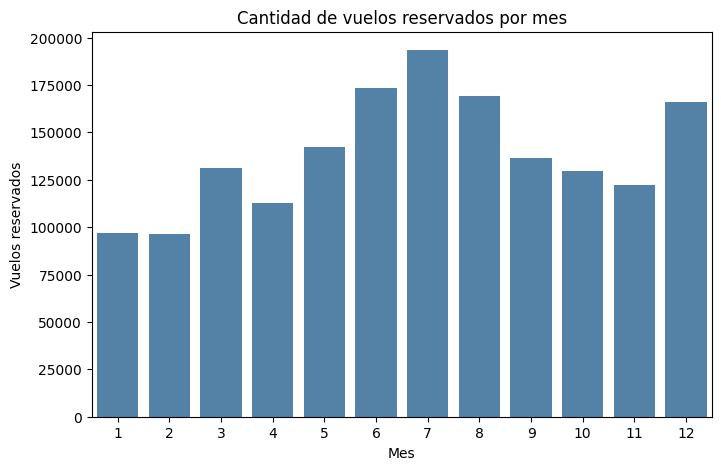

In [77]:
# graficamos usando el df_activity y agrupamos por las columnas 'Flights Booked' y 'Month'
flights_per_month = df_activity.groupby('Month')['Flights Booked'].sum()
plt.figure(figsize=(8,5))
sns.barplot(x=flights_per_month.index, y=flights_per_month.values, color="steelblue", legend=False)
plt.title('Cantidad de vuelos reservados por mes')
plt.xlabel('Mes')
plt.ylabel('Vuelos reservados')
plt.show()

2. ¬øExiste una relaci√≥n entre la distancia de los vuelos y los puntos acumulados por los cliente?

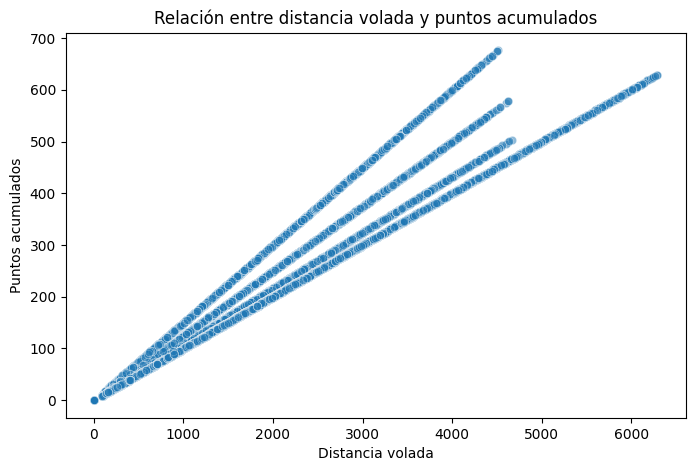

In [78]:
# graficamos utilizando el df_activity y las columnas 'Distance' y 'Points Accumulated'
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_activity, x='Distance', y='Points Accumulated', alpha=0.5)
plt.title('Relaci√≥n entre distancia volada y puntos acumulados')
plt.xlabel('Distancia volada')
plt.ylabel('Puntos acumulados')
plt.show()

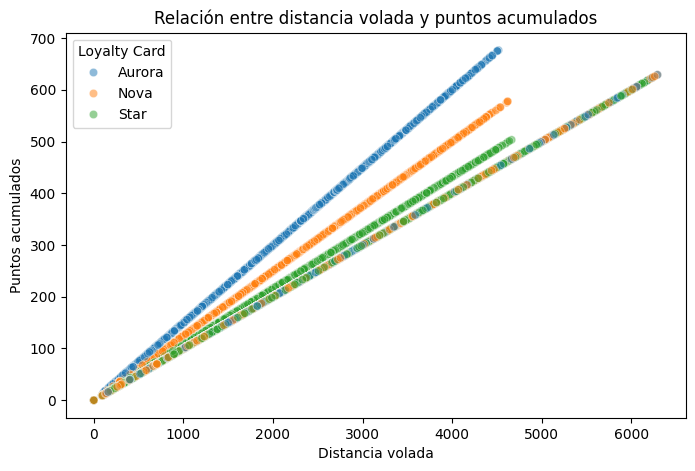

In [79]:
# graficamos para ver el tipo de tarjeta
df_plot = df_activity.merge(df_loyalty[['Loyalty Number', 'Loyalty Card']], on='Loyalty Number', how='left')
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_plot, x='Distance', y='Points Accumulated', alpha=0.5, hue='Loyalty Card')
plt.title('Relaci√≥n entre distancia volada y puntos acumulados')
plt.xlabel('Distancia volada')
plt.ylabel('Puntos acumulados')
plt.show()

3. ¬øCu√°l es la distribuci√≥n de los clientes por provincia o estado?

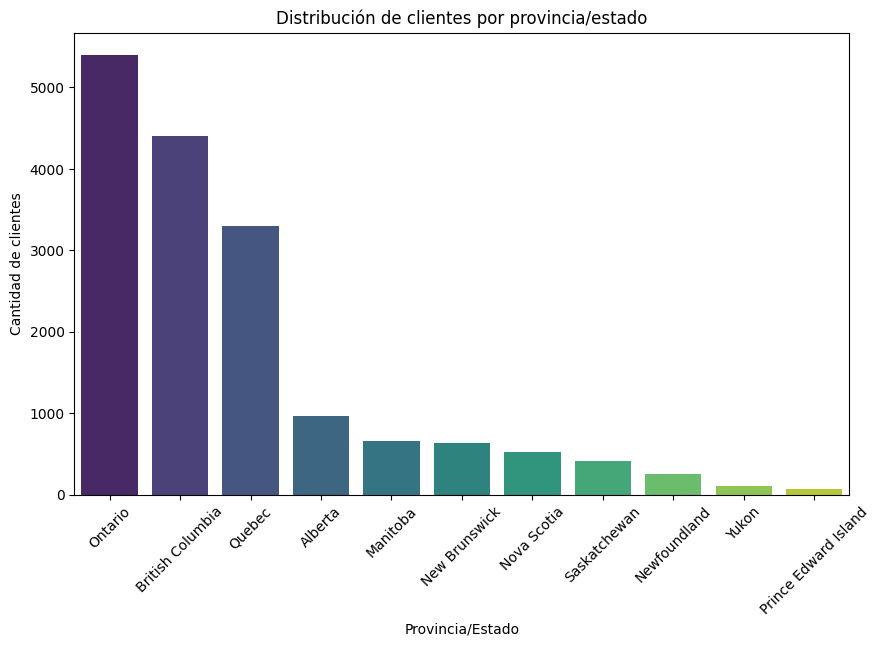

In [80]:
# graficamos usando el df_loyalty y la columna 'Province'
clientes_por_provincia = df_loyalty['Province'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=clientes_por_provincia.index, y=clientes_por_provincia.values, palette="viridis")
plt.title('Distribuci√≥n de clientes por provincia/estado')
plt.xlabel('Provincia/Estado')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.show()

4. ¬øC√≥mo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

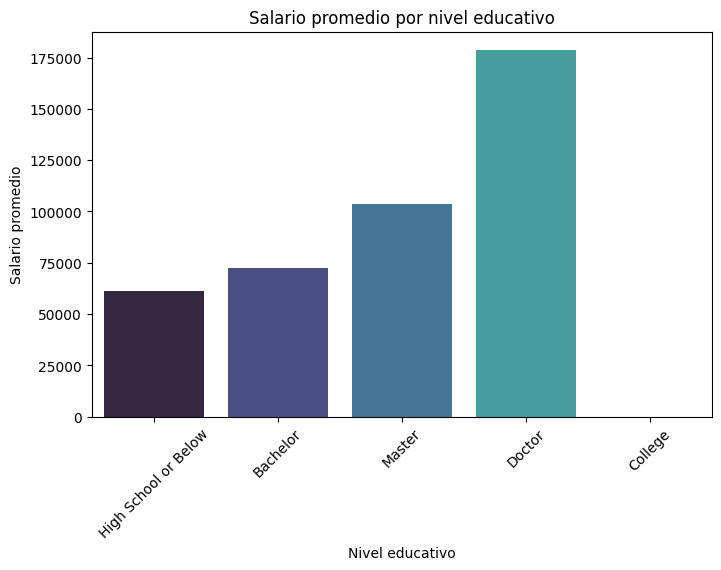

In [81]:
# graficamos utilizando el df_loyalty y agrupamos por las columnas 'Education' y 'Salary'
salario_educacion = df_loyalty.groupby('Education')['Salary'].mean().sort_values() #ordena en ascendente
plt.figure(figsize=(8,5))
sns.barplot(x=salario_educacion.index, y=salario_educacion.values, palette="mako")
plt.title('Salario promedio por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#vemos que la columna 'College' ya no aparece porque eliminamos sus filas nulas en la limpieza 

In [83]:
#printeo la suma de valores nulos que hay en 'College' antes de limpiar
print(df_loyalty[df_loyalty['Education'] == 'College']['Salary'].isnull().sum())

4238


In [84]:
# muestro la suma de valores nulos que hay en 'College' despu√©s de limpiar
print(df[df['Education'] == 'College']['Salary'].isnull().sum())

0


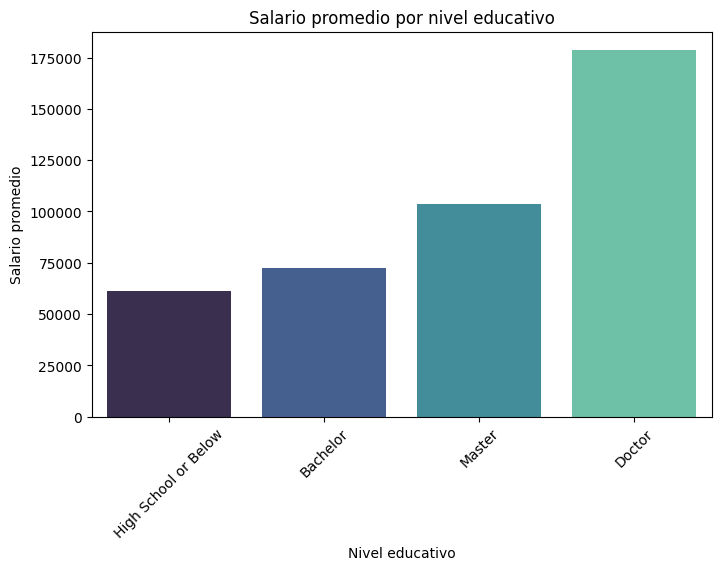

In [85]:
# graficamos el c√≥digo sin 'College'
salario_educacion = df_loyalty.groupby('Education')['Salary'].mean().sort_values().dropna() #ordena en ascendente y elimina NaN
plt.figure(figsize=(8,5))
sns.barplot(x=salario_educacion.index, y=salario_educacion.values, palette="mako")
plt.title('Salario promedio por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')
plt.xticks(rotation=45)
plt.show()

5. ¬øCu√°l es la proporci√≥n de clientes con diferentes tipos de tarjetas de fidelidad? 

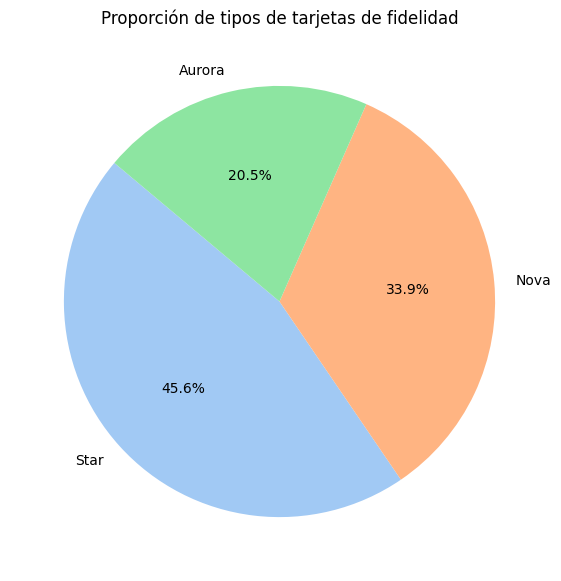

In [86]:
# graficamos usando el df_loyalty y la columna 'Loyalty Card'
tarjetas = df_loyalty['Loyalty Card'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(tarjetas.values, labels=tarjetas.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proporci√≥n de tipos de tarjetas de fidelidad')
plt.show()

6. ¬øC√≥mo se distribuyen los clientes seg√∫n su estado civil y g√©nero?

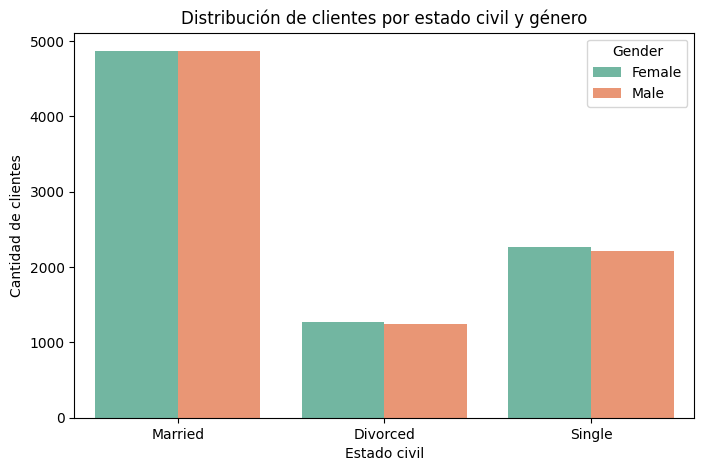

In [87]:
# graficamos utilizando el df_loyalty y las columnas 'Marital Status' y 'Gender'
plt.figure(figsize=(8,5))
sns.countplot(data=df_loyalty, x='Marital Status', hue='Gender', palette="Set2") #hue separa las barras por la columna 'Gender'
plt.title('Distribuci√≥n de clientes por estado civil y g√©nero')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad de clientes')
plt.show()

# Fase 3: BONUS

## 1. Preparaci√≥n de Datos

¬øExiste alguna relaci√≥n entre el n√∫mero de vuelos reservados y el nivel educativo?

In [88]:
# creamos un nuevo DataFrame con las columnas relevantes para hacer intersecci√≥n interna por la columna 'Loyalty Number' porque es el identificador √∫nco en ambos archivos
df_merge = df_activity[['Loyalty Number', 'Flights Booked']].merge(df_loyalty[['Loyalty Number', 'Education']], on='Loyalty Number', how='left') #left une todas las filas de las 2 columnas de df_activity (a la izquierda) 
df_filtrado = df_merge[['Flights Booked', 'Education']] #filtro solo por las columnas 'Flights Booked' y 'Education'
print(df_filtrado.head())

   Flights Booked Education
0               3  Bachelor
1              10   College
2               6   College
3               0  Bachelor
4               0  Bachelor


## 2. An√°lisis Descriptivo

In [89]:
# agrupamos por las 2 columnas para mostrar las estad√≠sticas descriptivas b√°sicas 
df_filtrado.groupby('Education')['Flights Booked'].describe() #no hace falta poner T.

count      mean       std  min  25%  50%  75%   max
Education                                                                   
Bachelor              253752.0  4.091093  5.216995  0.0  0.0  1.0  8.0  21.0
College               102672.0  4.153012  5.242136  0.0  0.0  1.0  8.0  21.0
Doctor                 17856.0  4.146281  5.250093  0.0  0.0  1.0  8.0  21.0
High School or Below   19008.0  4.155777  5.234551  0.0  0.0  1.0  8.0  21.0
Master                 12336.0  4.184014  5.210294  0.0  0.0  1.0  8.0  21.0

## 3. Prueba Estad√≠stica

In [96]:
# finalmente, al ser asim√©trica hacemos una prueba de hip√≥tesis con Mann-Whitney U para comparar promedio de los vuelos reservados entre los sectores 'Doctor' y 'High School or Below'
grupo1 = df_filtrado[df_filtrado['Education'] == 'Doctor']['Flights Booked']
grupo2 = df_filtrado[df_filtrado['Education'] == 'High School or Below']['Flights Booked']

stat, p_value = mannwhitneyu(grupo1, grupo2, alternative='two-sided')
print("Mann-Whitney U statistic: {:,.2f}".format(stat))
print("p-value:", round(p_value, 2))

Mann-Whitney U statistic: 169,260,336.50
p-value: 0.64


El resultado de p-value es 0.64, lo que indica que no hay una diferencia significativa en el n√∫mero de vuelos reservados entre los sectores 'Doctor' y 'High School or Below', ya que es mayor que 0.05. 

In [100]:
# y ahora la hacemos entre los sectores 'Master' y 'Bachelor'
grupo1 = df_filtrado[df_filtrado['Education'] == 'Master']['Flights Booked']
grupo2 = df_filtrado[df_filtrado['Education'] == 'Bachelor']['Flights Booked']

stat, p_value = mannwhitneyu(grupo1, grupo2, alternative='two-sided')
print("Mann-Whitney U statistic:", "{:,.2f}".format(stat))
print("p-value:", round(p_value, 2))

Mann-Whitney U statistic: 1,584,899,396.50
p-value: 0.01


Sin embargo, si luego comparamos los sectores 'Master' y 'Bachelor', nos da a entender que la diferencia es mayor que en el caso anterior porque p-value es 0.01. 

### **En conclusi√≥n, la prueba de hip√≥tesis realizada significa que no hay relaci√≥n uniforme entre los diferentes sectores y las reservas realizadas porque a veces las hacen m√°s los del nivel educativo superior y en otras ocasiones los del inferior.**